# RoleSim
----
Similarity measure from the **automorphic** equivalence family.

In [1]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

from RoleSim.RoleSim import *

## replies-276.graphml

In [2]:
# Load directed graph
directed_graph = nx.read_graphml('graphs/replies-276.graphml')
# Convert the graph to an undirected graph
actual_data_graph = directed_graph.to_undirected()
# Remove any nodes with no edges
actual_data_graph.remove_nodes_from(list(nx.isolates(actual_data_graph)))
print(f"Number of nodes: {actual_data_graph.number_of_nodes()}")
print(f"Number of edges: {actual_data_graph.number_of_edges()}")

Number of nodes: 276
Number of edges: 880


In [3]:
# Create mapping dictionaries
node_to_index_dict = {node: idx for idx, node in enumerate(actual_data_graph.nodes())}
index_to_node_dict = {idx: node for node, idx in node_to_index_dict.items()}
# Relabel the graph nodes to integers
global actual_data_graph
actual_data_graph = nx.relabel_nodes(actual_data_graph, node_to_index_dict)
print(f"Number of nodes: {actual_data_graph.number_of_nodes()}")
print(f"Number of edges: {actual_data_graph.number_of_edges()}")

Number of nodes: 276
Number of edges: 880


In [4]:
# Run RoleSim on graph
current_iteration = full_operation(actual_data_graph)
# Save the final RoleSim similarity graph?
nx.write_graphml(current_iteration, 'RoleSim/role_similarity-small.graphml')

666  nodes were inserted in the graph.
31019  nodes were pruned by rule 1.
2829  nodes were pruned by rule 2.
3436  nodes were pruned by rule 3.
142
666
[0, 32, 33, 48, 67, 83, 108, 178, 212, 213, 251, 271, 272, 1, 26, 188, 197, 205, 248, 3, 50, 79, 101, 112, 119, 120, 128, 154, 161, 252, 5, 14, 40, 55, 68, 151, 160, 209, 211, 273, 7, 61, 74, 86, 124, 158, 170, 214, 274, 11, 169, 263, 12, 13, 52, 15, 92, 268, 16, 17, 204, 223, 20, 236, 239, 21, 49, 90, 104, 227, 23, 41, 42, 116, 126, 186, 222, 232, 266, 29, 121, 145, 30, 31, 56, 96, 152, 187, 215, 247, 45, 46, 193, 99, 134, 173, 176, 184, 218, 51, 129, 149, 58, 69, 70, 136, 76, 80, 89, 138, 91, 275, 93, 237, 94, 133, 105, 115, 224, 132, 243, 137, 242, 141, 146, 148, 150, 200, 269, 155, 256, 167, 174, 177, 180, 196, 201, 202, 207, 210, 260, 270]
[(0, 32), (0, 33), (0, 48), (0, 67), (0, 83), (0, 108), (0, 178), (0, 212), (0, 213), (0, 251), (0, 271), (0, 272), (32, 17), (32, 26), (32, 83), (32, 212), (33, 83), (33, 212), (33, 271), (33, 

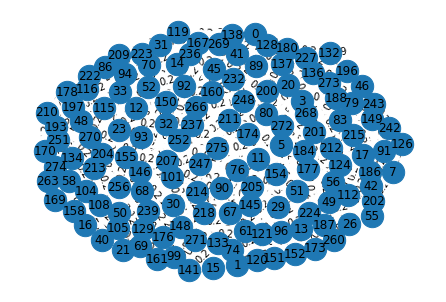

In [5]:
# Draw the graph with edge weights
pos = nx.spring_layout(current_iteration)
edge_labels = nx.get_edge_attributes(current_iteration, 'weight')
nx.draw(current_iteration, pos, with_labels=True, node_size=500)
nx.draw_networkx_edge_labels(current_iteration, pos, edge_labels=edge_labels)
plt.show()

## df_edge_list_directed_users_postings_replies.parquet

In [7]:
# Load .parquet data
postings_replies = pd.read_parquet('data/df_edge_list_directed_users_postings_replies.parquet')
# Randomly sample 10% of data
subset_postings_replies = postings_replies.sample(frac=0.1, random_state=1)
subset_postings_replies.head()

,ID_CommunityIdentity_Source,ID_CommunityIdentity_Target,count_posting_replies
781028,510681,66166,2
68617,26559,565355,4
620033,238360,501957,1
682167,499467,581430,2
789575,512318,573052,1


In [66]:
# Create undirected graph from the .parquet data
G = nx.Graph()
# Add edges to the graph, assuming count_posting_replies is the weight of the edges
for _, row in subset_postings_replies.iterrows():
    source = row['ID_CommunityIdentity_Source']
    target = row['ID_CommunityIdentity_Target']
    weight = row['count_posting_replies']
    if G.has_edge(source, target):
        G[source][target]['weight'] += weight  # Combine weights if edge exists
    else:
        G.add_edge(source, target, weight=weight)
print(f"Number of nodes: {G.number_of_nodes()}")
print(f"Number of edges: {G.number_of_edges()}")

Number of nodes: 9910
Number of edges: 122349


In [67]:
# Convert the graph to an undirected graph
actual_data_graph = G.to_undirected()
# Remove any nodes with no edges
actual_data_graph.remove_nodes_from(list(nx.isolates(actual_data_graph)))
print(f"Number of nodes: {actual_data_graph.number_of_nodes()}")
print(f"Number of edges: {actual_data_graph.number_of_edges()}")

Number of nodes: 9910
Number of edges: 122349


In [8]:
# Create mapping dictionaries
node_to_index_dict = {node: idx for idx, node in enumerate(actual_data_graph.nodes())}
index_to_node_dict = {idx: node for node, idx in node_to_index_dict.items()}
# Relabel the graph nodes to integers
actual_data_graph = nx.relabel_nodes(actual_data_graph, node_to_index_dict)
print(f"Number of nodes: {actual_data_graph.number_of_nodes()}")
print(f"Number of edges: {actual_data_graph.number_of_edges()}")

Number of nodes: 276
Number of edges: 880


In [10]:
# Run RoleSim on graph
current_iteration = full_operation(actual_data_graph)
# Save the final RoleSim similarity graph?
nx.write_graphml(current_iteration, 'RoleSim/role_similarity.graphml')

666  nodes were inserted in the graph.
31019  nodes were pruned by rule 1.
2829  nodes were pruned by rule 2.
3436  nodes were pruned by rule 3.
142
666
[0, 32, 33, 48, 67, 83, 108, 178, 212, 213, 251, 271, 272, 1, 26, 188, 197, 205, 248, 3, 50, 79, 101, 112, 119, 120, 128, 154, 161, 252, 5, 14, 40, 55, 68, 151, 160, 209, 211, 273, 7, 61, 74, 86, 124, 158, 170, 214, 274, 11, 169, 263, 12, 13, 52, 15, 92, 268, 16, 17, 204, 223, 20, 236, 239, 21, 49, 90, 104, 227, 23, 41, 42, 116, 126, 186, 222, 232, 266, 29, 121, 145, 30, 31, 56, 96, 152, 187, 215, 247, 45, 46, 193, 99, 134, 173, 176, 184, 218, 51, 129, 149, 58, 69, 70, 136, 76, 80, 89, 138, 91, 275, 93, 237, 94, 133, 105, 115, 224, 132, 243, 137, 242, 141, 146, 148, 150, 200, 269, 155, 256, 167, 174, 177, 180, 196, 201, 202, 207, 210, 260, 270]
[(0, 32), (0, 33), (0, 48), (0, 67), (0, 83), (0, 108), (0, 178), (0, 212), (0, 213), (0, 251), (0, 271), (0, 272), (32, 17), (32, 26), (32, 83), (32, 212), (33, 83), (33, 212), (33, 271), (33, 